# Code for Figure 5 part (b) and associated statistics reported in the text

Developed by Siobhan Powell, 2021. 

In [1]:
import os
os.chdir('../')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.gridspec import GridSpec
import pickle
import datetime

In [3]:
noev_scenario = pd.read_csv('Results/NoEVs_year2035_solar3.5x_wind3x_withstorage_dpdf_20220408.csv')

In [4]:
scens1 = ['_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersRandom_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem']
scens2 = ['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork']

vals1 = np.zeros((10, 7, 5)) # overgeneration
tables_dfs1 = {penlevel: pd.DataFrame(np.zeros((7, 5)), 
                          index=['_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersRandom_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem', '_TimersMixed_WPcontrol_minpeak'], 
                          columns=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork', 'BusinessAsUsual']) for penlevel in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

vals2 = np.zeros((10, 7, 5)) # ramping
tables_dfs2 = {penlevel: pd.DataFrame(np.zeros((7, 5)), 
                          index=['_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersRandom_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem', '_TimersMixed_WPcontrol_minpeak'], 
                          columns=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork', 'BusinessAsUsual']) for penlevel in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

for k, penlevel in enumerate([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]):
    if penlevel == 0.5:
        folder = 'Fuel1_Solar35_Wind3'
    else:
        folder = 'Fuel1_Solar35_Wind3_Curves'
    for i, scen1 in enumerate(scens1):
        for j, scen2 in enumerate(scens2):
            overgen = None
            dpdf = pd.read_csv('Results/'+folder+'/fuel1_solar3.5_wind3_'+scen2+scen1+'_penlevel'+str(penlevel)+'_withstorage_dpdf_20220408.csv')
            try:
                overgen = pd.read_csv('Results/'+folder+'/fuel1_solar3.5_wind3_'+scen2+scen1+'_penlevel'+str(penlevel)+'_overgeneration.csv')#'_storagebefore_overgeneration_afterstorage.csv')
            except:
                print('No overgen: ', scen1, scen2, penlevel)

            if overgen is not None:
                vals1[k, i, j] = np.abs(overgen.demand.sum())
                tables_dfs1[penlevel].loc[scen1, scen2] = np.abs(overgen.demand.sum())

            prof1 = np.zeros((25, ))
            prof1[np.arange(0, 24)] = dpdf['demand'].values.reshape(-1, 24).mean(axis=0) # in original 
            prof1[24] = prof1[0]
            vals2[k, i, j] = np.max(prof1[1:] - prof1[:-1])
            tables_dfs2[penlevel].loc[scen1, scen2] = np.max(prof1[1:] - prof1[:-1])
            
    # Business As Usual    
    scen2 = 'BusinessAsUsual'
    scen1 =  '_TimersMixed_WPcontrol_minpeak'
    i = i+1
    j = j+1
    overgen = None
    dpdf = pd.read_csv('Results/'+folder+'/fuel1_solar3.5_wind3_'+scen2+scen1+'_penlevel'+str(penlevel)+'_withstorage_dpdf_20220408.csv')
    try:
        overgen = pd.read_csv('Results/'+folder+'/fuel1_solar3.5_wind3_'+scen2+scen1+'_penlevel'+str(penlevel)+'_overgeneration.csv')#'_storagebefore_overgeneration_afterstorage.csv')
    except:
        print('No overgen: ', scen1, scen2, penlevel)
    if overgen is not None:
        vals1[k, i, j] = np.abs(overgen.demand.sum())
        tables_dfs1[penlevel].loc[scen1, scen2] = np.abs(overgen.demand.sum())

    prof = np.zeros((25, ))
    prof[np.arange(0, 24)] = dpdf['demand'].values.reshape(-1, 24).mean(axis=0)
    prof[24] = prof[0]
    vals2[k, i, j] = np.max(prof[1:] - prof[:-1])
    tables_dfs2[penlevel].loc[scen1, scen2] = np.max(prof[1:] - prof[:-1])
    


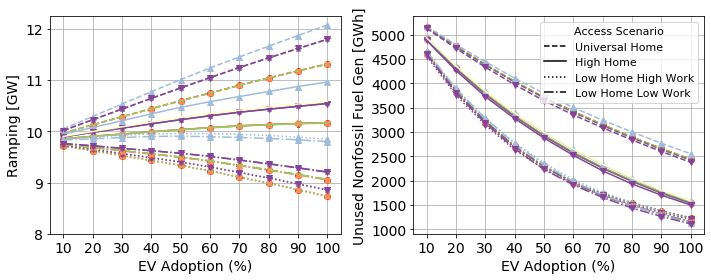

In [6]:
plt.figure(figsize=(10, 4))
colors = ['#d7301f', '#fc8d59', '#91cf60', '#737373', '#9ebcda', '#88419d']
lines = ['--', '-', ':', '-.']
markers=['P', 'X', 'b', '*', '^', 'v']
plt.subplot(121)
for idx_access in range(4):
    for idx_control in range(6):
        plt.plot(100*np.arange(0.1, 1.05, 0.1), (1/1000)*vals2[:, idx_control, idx_access], lines[idx_access]+markers[idx_control], color=colors[idx_control])
plt.plot(100*np.arange(0.1, 1.05, 0.1), (1/1000)*vals2[:, 6, 4], lines[1], color='#ffffbf')
plt.xticks(100*np.arange(0.1, 1.05, 0.1), fontsize=14)
plt.xlabel('EV Adoption (%)', fontsize=14)
plt.gca().set_axisbelow(True)        
plt.gca().grid()
plt.yticks(np.arange(8, 13, 1), fontsize=14)
plt.ylabel('Ramping [GW]', fontsize=14)

plt.subplot(122)

for idx_access in range(4):
    for idx_control in range(6):
        plt.plot(100*np.arange(0.1, 1.05, 0.1), (1/1000)*vals1[:, idx_control, idx_access], lines[idx_access]+markers[idx_control], color=colors[idx_control])
plt.plot(100*np.arange(0.1, 1.05, 0.1), (1/1000)*vals1[:, 6, 4], lines[1], color='#ffffbf')
plt.xticks(100*np.arange(0.1, 1.05, 0.1), fontsize=14)
plt.xlabel('EV Adoption (%)', fontsize=14)
plt.ylabel('Unused Nonfossil Fuel Gen [GWh]', fontsize=14)
plt.yticks(fontsize=14)
plt.gca().set_axisbelow(True)        
plt.gca().grid()


scens2 = ['Universal Home', 'High Home', 'Low Home High Work', 'Low Home Low Work']
legend_elements = [Line2D([0], [0], marker=None, color='k', 
                          label=scens2[j], linestyle=lines[j], markerfacecolor=colors[2]) for j in range(4)]
legend = plt.legend(handles=legend_elements, loc='upper right', fontsize=11, title='Access Scenario')
plt.setp(legend.get_title(),fontsize=11)

plt.tight_layout()
plt.savefig('MainPlotting/Plots/fig5b_2035_withoutstorage.pdf', bbox_inches='tight')

plt.show()


In [7]:
scens1 = ['_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersRandom_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem']
scens2 = ['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork']

vals1 = np.zeros((10, 7, 5)) # overgeneration
tables_dfs1 = {penlevel: pd.DataFrame(np.zeros((7, 5)), 
                          index=['_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersRandom_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem', '_TimersMixed_WPcontrol_minpeak'], 
                          columns=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork', 'BusinessAsUsual']) for penlevel in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

vals2 = np.zeros((10, 7, 5)) # ramping
tables_dfs2 = {penlevel: pd.DataFrame(np.zeros((7, 5)), 
                          index=['_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersRandom_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem', '_TimersMixed_WPcontrol_minpeak'], 
                          columns=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork', 'BusinessAsUsual']) for penlevel in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

for k, penlevel in enumerate([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]):
    if penlevel == 0.5:
        folder = 'Fuel1_Solar35_Wind3'
    else:
        folder = 'Fuel1_Solar35_Wind3_Curves'
    for i, scen1 in enumerate(scens1):
        for j, scen2 in enumerate(scens2):
            overgen = None
            if penlevel == 0.5:
                dpdf = pd.read_csv('Results/'+folder+'/fuel1_solar3.5_wind3_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_withstorage_dpdf_20220408.csv')
            else:
                dpdf = pd.read_csv('Results/'+folder+'/fuel1_solar3.5_wind3_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_futuredemand_df_20220408.csv')
            try:
                overgen = pd.read_csv('Results/'+folder+'/fuel1_solar3.5_wind3_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_overgeneration_afterstorage.csv')
            except:
                print('No overgen: ', scen1, scen2, penlevel)

            if overgen is not None:
                vals1[k, i, j] = np.abs(overgen.demand.sum())
                tables_dfs1[penlevel].loc[scen1, scen2] = np.abs(overgen.demand.sum())

            prof1 = np.zeros((25, ))
            prof1[np.arange(0, 24)] = dpdf['demand'].values.reshape(-1, 24).mean(axis=0) # in original 
            prof1[24] = prof1[0]
            vals2[k, i, j] = np.max(prof1[1:] - prof1[:-1])
            tables_dfs2[penlevel].loc[scen1, scen2] = np.max(prof1[1:] - prof1[:-1])
            
    # Business As Usual    
    scen2 = 'BusinessAsUsual'
    scen1 =  '_TimersMixed_WPcontrol_minpeak'
    i = i+1
    j = j+1
    overgen = None
    if penlevel == 0.5:
        dpdf = pd.read_csv('Results/'+folder+'/fuel1_solar3.5_wind3_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_withstorage_dpdf_20220408.csv')
    else:
        dpdf = pd.read_csv('Results/'+folder+'/fuel1_solar3.5_wind3_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_futuredemand_df_20220408.csv')
    try:
        overgen = pd.read_csv('Results/'+folder+'/fuel1_solar3.5_wind3_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_overgeneration_afterstorage.csv')
    except:
        print('No overgen: ', scen1, scen2, penlevel)
    if overgen is not None:
        vals1[k, i, j] = np.abs(overgen.demand.sum())
        tables_dfs1[penlevel].loc[scen1, scen2] = np.abs(overgen.demand.sum())

    prof = np.zeros((25, ))
    prof[np.arange(0, 24)] = dpdf['demand'].values.reshape(-1, 24).mean(axis=0)
    prof[24] = prof[0]
    vals2[k, i, j] = np.max(prof[1:] - prof[:-1])
    tables_dfs2[penlevel].loc[scen1, scen2] = np.max(prof[1:] - prof[:-1])
    


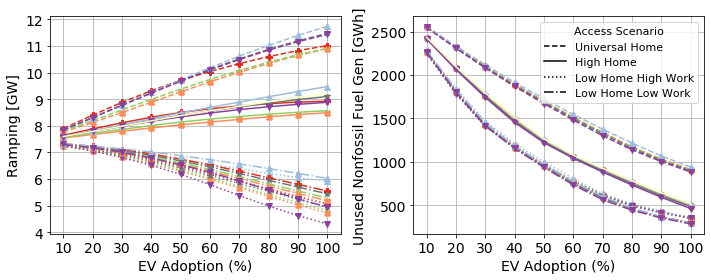

In [9]:
plt.figure(figsize=(10, 4))
colors = ['#d7301f', '#fc8d59', '#91cf60', '#737373', '#9ebcda', '#88419d']
lines = ['--', '-', ':', '-.']
markers=['P', 'X', 'b', '*', '^', 'v']
plt.subplot(121)
for idx_access in range(4):
    for idx_control in range(6):
        plt.plot(100*np.arange(0.1, 1.05, 0.1), (1/1000)*vals2[:, idx_control, idx_access], lines[idx_access]+markers[idx_control], color=colors[idx_control])
plt.plot(100*np.arange(0.1, 1.05, 0.1), (1/1000)*vals2[:, 6, 4], lines[1], color='#ffffbf')
plt.xticks(100*np.arange(0.1, 1.05, 0.1), fontsize=14)
plt.xlabel('EV Adoption (%)', fontsize=14)
plt.gca().set_axisbelow(True)        
plt.gca().grid()
plt.yticks(np.arange(4, 13, 1), fontsize=14)
plt.ylabel('Ramping [GW]', fontsize=14)

plt.subplot(122)

for idx_access in range(4):
    for idx_control in range(6):
        plt.plot(100*np.arange(0.1, 1.05, 0.1), (1/1000)*vals1[:, idx_control, idx_access], lines[idx_access]+markers[idx_control], color=colors[idx_control])
plt.plot(100*np.arange(0.1, 1.05, 0.1), (1/1000)*vals1[:, 6, 4], lines[1], color='#ffffbf')
plt.xticks(100*np.arange(0.1, 1.05, 0.1), fontsize=14)
plt.xlabel('EV Adoption (%)', fontsize=14)
plt.ylabel('Unused Nonfossil Fuel Gen [GWh]', fontsize=14)
plt.yticks(fontsize=14)
plt.gca().set_axisbelow(True)        
plt.gca().grid()


scens2 = ['Universal Home', 'High Home', 'Low Home High Work', 'Low Home Low Work']
legend_elements = [Line2D([0], [0], marker=None, color='k', 
                          label=scens2[j], linestyle=lines[j], markerfacecolor=colors[2]) for j in range(4)]
legend = plt.legend(handles=legend_elements, loc='upper right', fontsize=11, title='Access Scenario')
plt.setp(legend.get_title(),fontsize=11)

plt.tight_layout()
plt.savefig('MainPlotting/Plots/fig5b_2035_withstorage.pdf', bbox_inches='tight')

plt.show()
